In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv('../data/MI_seq.csv')

In [11]:
data = data.sort_values(['subject','trial'])
data.reset_index(drop = True, inplace = True)

In [12]:
data

,trialindex,trial,subject,tottime,rt,flashon1,flashon2,flashon3,flashon4,flashon5,...,ctime2,ctime3,ctime4,ctime5,ctime6,rel1,rel2,rel3,rel4,rel5
0,101,3,47066,6688,1545,white,grey,grey,white,white,...,6794,7014,7254,7487,7679,-117.0,-140.0,-159.0,-152.0,-111.0
1,103,5,47066,9367,1666,grey,white,white,white,grey,...,9323,9532,9767,10019,10362,-115.0,-128.0,-155.0,-172.0,-262.0
2,105,7,47066,11980,1603,white,grey,grey,grey,white,...,12036,12254,12489,12738,12975,-129.0,-138.0,-154.0,-169.0,-156.0
3,107,9,47066,14797,1808,grey,white,grey,grey,grey,...,14617,14833,15424,15626,15793,-133.0,-135.0,-511.0,-121.0,-86.0
4,109,11,47066,17436,1630,grey,white,white,white,white,...,17546,17763,17997,18231,18432,-131.0,-137.0,-153.0,-154.0,-120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,95,191,99663,312731,2125,white,white,grey,grey,white,...,312013,312327,312657,312985,313268,-164.0,-227.0,-211.0,-483.0,-290.0
436,96,193,99663,315889,2154,grey,white,grey,white,grey,...,315149,315472,315847,316136,316427,-164.0,-223.0,-174.0,-565.0,-340.0
437,97,195,99663,318709,1815,grey,white,grey,grey,grey,...,318067,318340,318644,318957,319245,-164.0,-173.0,-209.0,-179.0,-189.0
438,98,197,99663,321998,2284,white,grey,grey,grey,grey,...,320849,321108,321377,322271,322535,-164.0,-168.0,-200.0,-209.0,-169.0


In [20]:
data.columns

Index(['trialindex', 'trial', 'subject', 'tottime', 'rt', 'flashon1',
       'flashon2', 'flashon3', 'flashon4', 'flashon5', 'ontime1', 'ontime2',
       'ontime3', 'ontime4', 'ontime5', 'offtime1', 'offtime2', 'offtime3',
       'offtime4', 'offtime5', 'choice1n', 'choice2', 'choice3', 'choice4',
       'choice5', 'choice6', 'ctime1n', 'ctime2', 'ctime3', 'ctime4', 'ctime5',
       'ctime6', 'rel1', 'rel2', 'rel3', 'rel4', 'rel5'],
      dtype='object')

In [25]:
# align all times to the first choice

flashcols = ['flashon1','flashon2','flashon3','flashon4','flashon5']
flashoncols = ['ontime1','ontime2','ontime3','ontime4','ontime5']
flashoffcols = ['offtime1','offtime2','offtime3','offtime4','offtime5']
touchtcols = ['ctime1n', 'ctime2', 'ctime3', 'ctime4', 'ctime5', 'ctime6']

time_cols = [flashoncols, flashoffcols, touchtcols]
start_time = data.ctime1n

for cols in time_cols:
    
    data.loc[:, cols] = data[cols].subtract(start_time, axis = 0)

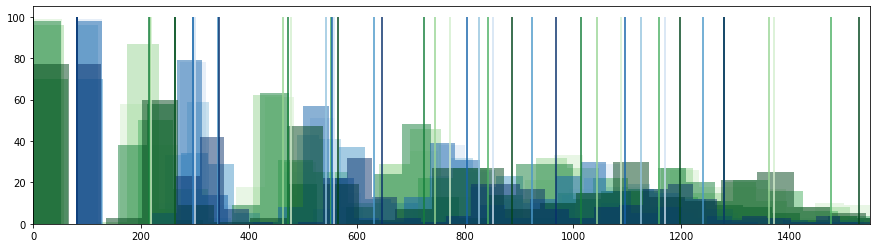

In [50]:
fig_timeline, axs_timeline = plt.subplots(1,1, figsize = (15,4))
subs = np.unique(data.subject)
flash_cmap = plt.cm.Blues(np.linspace(0.2, 1, len(subs)))
choice_cmap = plt.cm.Greens(np.linspace(0.2, 1, len(subs)))

for sub, fc, cc in zip(subs, flash_cmap, choice_cmap):
    
    flashes = []
    for flash in flashoncols:
        flashes.append(data[data.subject==sub][flash])
        axs_timeline.vlines(np.mean(data[data.subject==sub][flash]),0,100, color = fc)
    
    choices = []
    for choice in touchtcols:
        choices.append(data[data.subject==sub][choice])
        axs_timeline.vlines(np.mean(data[data.subject==sub][choice]),0,100, color = cc)

    axs_timeline.hist(choices, 40, color = [cc]*len(choices), alpha = 0.5,stacked = True)    
    axs_timeline.hist(flashes, 40, color = [fc]*len(flashes), alpha = 0.5,stacked = True)
    
    axs_timeline.set_xlim(0, 1550);

['ontime1', 'ontime2', 'ontime3', 'ontime4', 'ontime5']
['offtime1', 'offtime2', 'offtime3', 'offtime4', 'offtime5']
['ctime1n', 'ctime2', 'ctime3', 'ctime4', 'ctime5', 'ctime6']


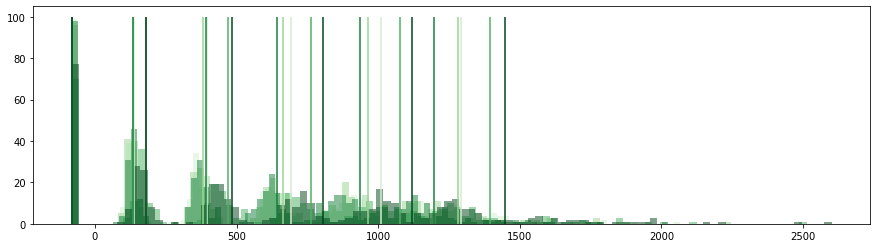

In [67]:
# express all rts relative to first flash
flash_dat = data.copy()
fig_flash1, axs_flash1 = plt.subplots(1,1, figsize = (15,4))

f1 = data.ontime1

for cols in time_cols:
    #print(cols)
    flash_dat.loc[:, cols] = flash_dat[cols].subtract(f1, axis = 0)
    
for sub, cc in zip(subs, choice_cmap):

    choices = []
    for choice in touchtcols:
        #print(choice)
        choices.append(flash_dat[flash_dat.subject==sub][choice])
        axs_flash1.vlines(np.mean(flash_dat[flash_dat.subject==sub][choice]),0,100, color = cc)

    axs_flash1.hist(choices, 100, color = [cc]*len(choices), alpha = 0.5,stacked = True);    
    
    #axs_flash1.set_xlim(-200, 1550);

In [68]:
# find the movement rate before a flash

# movement rate after a flash

0     -81
1     -81
2     -81
3     -80
4     -81
       ..
435   -82
436   -81
437   -81
438   -81
439   -81
Name: ctime1n, Length: 440, dtype: int64